<img align="center" src="http://68.media.tumblr.com/92a71d62ace9940f8ddd540400444fc4/tumblr_inline_mppo32jFBC1qz4rgp.png"><p>
<h1><center>Capstone Project</center></h1><br><h1>Project: <em>Rio de Janeiro Business Segmentation by Neighborhood</em><h1>

### This project is part of the <em>'Applied Data Science Capstone Course'</em> from my Coursera Classes.

#### Developer: Diego Medeiros <br>GitHub: www.github.com/medeirox

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduction</a><br>

2. <a href="#item2">Data</a><br>

3. <a href="#item3">Methodology</a><br>

4. <a href="#item4">Implementation</a>

</font>
</div>

<a id='item1'></a>

# 1. Business Problem

When starting a business, one needs to be as much confident as he can about the possibilites of success, and since a deep crisis in Brazil started, entreperneurs are having a hard time.<br>
Many people have lauched an entrepreneur career due to difficulty in finding a job, gathering as much money as they can from economies, family and friends with the hope of succeess as the only option.

This analysis focuses mainly on the stabilished businesses of each neighborhood, trying to model each place in a fashion to correlate to others and evidence possibilities of making profit from lacking areas. 

For the government, these observations can show possibilities for leveraging business benefits to grow certain areas.

An insight of the neighborhood lifestyle might become available as well, since the business needs says so much from a place, and the stakeholder can even take other benefits beyond the insights present in this report.

<strong>Target Audience:</strong><br>
Entrepreneurs seeking for an opportunity to invest resources.

<strong>Stakeholders:</strong>
    <ul>
    <li>Entrepreneurs</li>
    <li>Government of Rio de Janeiro</li>
    <li>Angel Investors</li>
    <li>Financing Groups</li>
    <li>Banks</li>
    </ul>



<a id='item2'></a>

# 2. Data

The following data is used to gather the target insights
<p>

<strong>1. List of Rio de Janeiro's neighborhoods</strong>
<br>
Source: <a href="https://pt.wikipedia.org/wiki/Lista_de_bairros_da_cidade_do_Rio_de_Janeiro">Wikipedia list of Neighborhoods</a>
<br>
Inquiry date: 14/07/2019
<br>
Description: Wikipedia URL with the list and description of each neighborhood in Rio de Janeiro.
<br>
Type of resouce: Web page
<br>
Type of data: Html
<p>

<strong>2. Geolocation GeoPy, GeoCoder and LocationIQ API</strong>
<br>
Source 1: <a href="https://anaconda.org/conda-forge/geopy">GeoPy Library</a>
<br>
Source 2: <a href="https://anaconda.org/conda-forge/geocoder">Geocoder Library</a>
<br>
Source 3: <a href="https://locationiq.com/">LocationIQ</a>
<br>
Inquiry date: 14/07/2019
<br>
Description: GeoPy and Geocoder are both libraries for geoencoding of addresses. GeoPy will be used as the primary resource, and if data cannot be retreived from it, then Geocoder will be used associated with a LocationIQ free account assigned. Observe that, since LocationIQ has restrictions on the number of requests for the free account, it has been assinged as the backup resource.
<br>
Type of resource: Python Library
<br>
Type of Data: Source 1: Python Object | Source 2 and 3: JSON
<p>

<strong>3. Foursquare location information API</strong>
<br>
Source: <a href="https://foursquare.com">Foursquare</a>
<br>
Inquiry date: 14/07/2019
<br>
Description: Location business information API.
<br>
Type of resource: Restful API
<br>
Type of data: JSON
<br>



<a id='item3'></a>

# 3. Methodology

In a nutshell, the methodology to be used in this report is described below.

1. Data collected from the Wikipedia page has been processed to create a DataFrame of neighborhoods of Rio de Janeiro;
<p>
    
2. Gather the geolocation of each neighborhood and append to the initial dataframe;
<p>
    
3. Explore the data
<p>

4. Pre-process the data for the Machine Learning Algorithm
<p>
    
5. Run the model and plot the results

For this research, venues from all neighborhoods from Rio de Janeiro have been explored to enable

Nesta pesquisa, dados de todas as vizinhanças do Rio de Janeiro foram avaliadas, de forma a possibilitar o mapeamento de regiões que apresentem estilos de vida semelhantes, sendo esta informação representada pelo comércio presente em cada um destes locais.

Durante os estudos, foi considerado um raio de 2km a partir do centro de cada vizinhança, o que espelha uma quantidade considerável de dados a serem avaliados.

Durante o processo de exploração dos dados ficou evidente que os segmentos com maior incidëncia na cidade são os bares, restaurantes, academias, pizzarias e padarias.

Para ter uma melhor visualização dos dados, resolvemos segmentar as vizinhanças em 10 clusters, de forma que ficasse mais fácil visualizar a relação de estilo de vida entre elas. Para esta parte do trabalho, considerou-se a utilização de machine learning com o algoritmo k-means.

A operação do machine learning sobre os dados apresentou excelente resultado, onde foi possível ver que os bairros vizinhos partilham muito em comum, e a cidade terminou por ficar segmentada em regiões bem específicas.

Gráficos de barra foram utilizados para comparar a quantidade de locais em cada cluster, bem como a média de locais por vizinhança, de modo a trazer para os interessados a informação de negócios com potencial de investimento, pois possuem uma média baixa em relação a localidade, o que pode demonstra que alguns bairros estão consumindo recursos de outros bairros próximos.

<a id='item4'></a>

## 4. Implementation

In [1]:
# Imports

import pandas as pd
import numpy as np
import requests
import copy

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
# External Dependencies Installation

!conda install -c conda-forge geocoder --yes
!conda install -c conda-forge folium=0.5.0 --yes
print('Dependencies installed')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geocoder:        1.38.1-py_1       conda-forge
    ratelim:         0.1.6-py_2        conda-forge

The following packages will be UPDATED:

    

In [3]:
# External Dependencies Imports
import geocoder
from geopy.geocoders import Nominatim
import folium

In [4]:
# Data import configuration
import_from_csv = False

In [5]:
# The code was removed by Watson Studio for sharing.

First, we'll gather data from Wikipedia regarding the name of all neighborhoods in Rio de Janeiro

In [6]:
raw_ = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_bairros_da_cidade_do_Rio_de_Janeiro')
df_neigh = raw_[0]
df_neigh

,0,1,2,3
0,Bairros oficiais,Bairros oficiais,Bairros oficiais,Bairros oficiais
1,Zona,Subprefeitura(nº de bairros),Bairros[5],Imagens
2,Central,Centro Histórico e Zona Portuária (17)[6][7],Bairro Imperial de São Cristóvão • Benfica • C...,NaN
3,Sul,Zona Sul (17)[8],Botafogo • Catete • Copacabana • Cosme Velho •...,NaN
4,Oeste,Barra da Tijuca e Baixada de Jacarepaguá (19),Anil • Barra da Tijuca • Camorim • Cidade de D...,NaN
5,Oeste,Grande Bangu (10)[9],Bangu • Deodoro • Gericinó • Magalhães Bastos ...,NaN
6,Oeste,Zona Oeste (10),Barra de Guaratiba • Campo Grande • Cosmos • G...,NaN
7,Norte,Grande Tijuca (7),Alto da Boa Vista • Andaraí • Grajaú • Praça d...,NaN
8,Norte,Grande Méier (21)[10],Abolição • Água Santa • Cachambi • Del Castilh...,NaN
9,Norte,Ilha do Governador e Zona da Leopoldina (19),Bonsucesso • Bancários • Cacuia • Cidade Unive...,NaN


In [7]:
df_neigh.drop([0,1], inplace=True)
df_neigh.drop([1,3],axis=1, inplace=True)
df_neigh

,0,2
2,Central,Bairro Imperial de São Cristóvão • Benfica • C...
3,Sul,Botafogo • Catete • Copacabana • Cosme Velho •...
4,Oeste,Anil • Barra da Tijuca • Camorim • Cidade de D...
5,Oeste,Bangu • Deodoro • Gericinó • Magalhães Bastos ...
6,Oeste,Barra de Guaratiba • Campo Grande • Cosmos • G...
7,Norte,Alto da Boa Vista • Andaraí • Grajaú • Praça d...
8,Norte,Abolição • Água Santa • Cachambi • Del Castilh...
9,Norte,Bonsucesso • Bancários • Cacuia • Cidade Unive...
10,Norte,Acari • Anchieta • Barros Filho • Bento Ribeir...


In [8]:
df_neigh.columns = ['Zone', 'Neighborhood']
df_neigh.reset_index(inplace=True)
df_neigh.drop('index', axis=1, inplace=True)
df_neigh

,Zone,Neighborhood
0,Central,Bairro Imperial de São Cristóvão • Benfica • C...
1,Sul,Botafogo • Catete • Copacabana • Cosme Velho •...
2,Oeste,Anil • Barra da Tijuca • Camorim • Cidade de D...
3,Oeste,Bangu • Deodoro • Gericinó • Magalhães Bastos ...
4,Oeste,Barra de Guaratiba • Campo Grande • Cosmos • G...
5,Norte,Alto da Boa Vista • Andaraí • Grajaú • Praça d...
6,Norte,Abolição • Água Santa • Cachambi • Del Castilh...
7,Norte,Bonsucesso • Bancários • Cacuia • Cidade Unive...
8,Norte,Acari • Anchieta • Barros Filho • Bento Ribeir...


In [9]:
df_neigh['Neighborhood'] = df_neigh['Neighborhood'].transform(lambda x: x.split('•'))
df_neigh

,Zone,Neighborhood
0,Central,"[Bairro Imperial de São Cristóvão , Benfica ,..."
1,Sul,"[Botafogo , Catete , Copacabana , Cosme Vel..."
2,Oeste,"[Anil , Barra da Tijuca , Camorim , Cidade ..."
3,Oeste,"[Bangu , Deodoro , Gericinó , Magalhães Bas..."
4,Oeste,"[Barra de Guaratiba , Campo Grande , Cosmos ..."
5,Norte,"[Alto da Boa Vista , Andaraí , Grajaú , Pra..."
6,Norte,"[Abolição , Água Santa , Cachambi , Del Cas..."
7,Norte,"[Bonsucesso , Bancários , Cacuia , Cidade U..."
8,Norte,"[Acari , Anchieta , Barros Filho , Bento Ri..."


In [10]:
column_names = ['Zone', 'Neighborhood', 'Latitude', 'Longitude']
df_neigh1 = pd.DataFrame(columns=column_names)
#df_neigh1.columns = ['Zone', 'Neighborhood', 'Latitude', 'Longitude']
for z, neig_series in zip(df_neigh['Zone'], df_neigh['Neighborhood']):
    for n in neig_series:
        #print([z, n, 0.0, 0.0])
        df_neigh1 = df_neigh1.append(
            pd.DataFrame({'Zone':[z], 'Neighborhood':[n.strip()], \
                          'Latitude':[0.0], 'Longitude':[0.0]}, \
                          columns=column_names), ignore_index=True)
df_neigh1.head()

,Zone,Neighborhood,Latitude,Longitude
0,Central,Bairro Imperial de São Cristóvão,0.0,0.0
1,Central,Benfica,0.0,0.0
2,Central,Caju,0.0,0.0
3,Central,Catumbi,0.0,0.0
4,Central,Centro,0.0,0.0


In [11]:
df_neigh1.shape

(157, 4)

### Gathering of geoposition from the neighborhoods

In [12]:
if(import_from_csv):
    df_latlon = pd.read_csv('rio_neighbourhood_latlon', encoding='utf-8')
else:
    import time
    from geopy.geocoders import Nominatim
    import geocoder

    enable_geocoder = True
    enable_nominatim = False

    address = 'Rio de Janeiro, RJ, Brasil'

    if(enable_nominatim):
        geolocator = Nominatim(user_agent="rio_explorer")

    df_latlon = pd.DataFrame(columns=column_names[2:])

    for idx, neig in enumerate(df_neigh1['Neighborhood']):
        location = None
        while(location is None):
            if(enable_nominatim):
                location = geolocator.geocode('{}, {}'.format(neig, address))
            if(enable_geocoder):
                location = geocoder.locationiq('{}, {}'.format(neig, address), key=LOCATIONIQ_TOKEN)

            if(location is None):
                print('Error gathering data for {}, consulting contigency geocoder server'.format(neig))
                location = geocoder.locationiq('{}, {}'.format(neig, address), key=LOCATIONIQ_TOKEN)
                latitude = location.lat
                longitude = location.lng
            else:
                if(enable_nominatim):
                    latitude = location.latitude
                    longitude = location.longitude
                if(enable_geocoder):
                    latitude = location.lat
                    longitude = location.lng

            print('Neighborhood: {} | Lat: {} | Lon: {}'.format(neig, latitude, longitude))
            df_latlon = df_latlon.append(
                pd.DataFrame({'Latitude':[latitude], 'Longitude':[longitude]}, \
                      columns=column_names[2:]), ignore_index=True)
            if(enable_geocoder):
                # The free account has a limitation of 60 requests per minute
                time.sleep(1.1)

    df_latlon


Neighborhood: Bairro Imperial de São Cristóvão | Lat: -22.899318 | Lon: -43.2219346
Neighborhood: Benfica | Lat: -22.8922965 | Lon: -43.240341
Neighborhood: Caju | Lat: -22.8803063 | Lon: -43.2214936
Neighborhood: Catumbi | Lat: -22.91966225 | Lon: -43.1990636825566
Neighborhood: Centro | Lat: -22.9043934 | Lon: -43.1830653
Neighborhood: Cidade Nova | Lat: -22.9100508 | Lon: -43.201756
Neighborhood: Estácio | Lat: -22.9166265 | Lon: -43.20363
Neighborhood: Gamboa | Lat: -22.8977491 | Lon: -43.1929041
Neighborhood: Lapa | Lat: -22.9130257 | Lon: -43.1822358
Neighborhood: Mangueira | Lat: -22.904153 | Lon: -43.2364971
Neighborhood: Paquetá | Lat: -22.7589261 | Lon: -43.1091992
Neighborhood: Rio Comprido | Lat: -22.9279449 | Lon: -43.2088566
Neighborhood: Santa Teresa | Lat: -22.9213991 | Lon: -43.1882138
Neighborhood: Santo Cristo | Lat: -22.9007657 | Lon: -43.2033933
Neighborhood: Saúde | Lat: -22.8971835 | Lon: -43.1841545
Neighborhood: Vasco da Gama | Lat: -22.8915219 | Lon: -43.22671

In [13]:
# Let's keep this processed data into a file to speed up the process in future work.
if(not import_from_csv):
    df_latlon.to_csv('rio_neighborhood_latlon', encoding='utf-8')

### Checking information from imported dataframe

In [14]:
df_latlon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
Latitude     157 non-null float64
Longitude    157 non-null float64
dtypes: float64(2)
memory usage: 2.5 KB


In [15]:
df_latlon.describe()

,Latitude,Longitude
count,157.000000,157.000000
mean,-22.481842,-43.491198
std,4.922308,2.551046
min,-23.047039,-75.102826
25%,-22.921399,-43.362903
50%,-22.888609,-43.295548
75%,-22.843507,-43.223346
max,38.773670,-41.036737


In [16]:
# Check coherence of data
df_latlon.plot(kind='scatter', y='Latitude', x='Longitude')

In [17]:
df_neigh2 = df_neigh1
df_neigh2['Latitude'] = df_latlon['Latitude']
df_neigh2['Longitude'] = df_latlon['Longitude']
df_neigh2.head()

,Zone,Neighborhood,Latitude,Longitude
0,Central,Bairro Imperial de São Cristóvão,-22.899318,-43.221935
1,Central,Benfica,-22.892297,-43.240341
2,Central,Caju,-22.880306,-43.221494
3,Central,Catumbi,-22.919662,-43.199064
4,Central,Centro,-22.904393,-43.183065


In [18]:
df_neigh2[(df_latlon['Longitude']>-43) | (df_latlon['Longitude'] < -45)]

,Zone,Neighborhood,Latitude,Longitude
22,Sul,Glória (bairro do Rio de Janeiro),38.773670,-75.102826
88,Norte,Manguinhos,-21.452964,-41.036737
91,Norte,Piedade,-21.926150,-41.769976


The 3 data above are giving spots out of Rio de Janeiro. To have a fast resolution of the problem, I'll take this data manually from google maps and will feed the DataSet.

From Google Maps we get:
Glória: -22.921433, -43.172496
Manguinhos: -22.878704, -43.245644
Piedade: -22.890336, -43.309663

Since Glória is the only neighborhood with unnecessary data in the description, we'll clean it as well

In [19]:
# Neighborhood geolocation correction
df_neigh2.loc[22, 'Latitude']=-22.921433; df_neigh2.loc[22, 'Longitude']=-43.172496
df_neigh2.loc[88, 'Latitude']=-22.878704; df_neigh2.loc[88, 'Longitude']=-43.245644
df_neigh2.loc[91, 'Latitude']=-22.890336; df_neigh2.loc[91, 'Longitude']=-43.309663

# Neighborhood name correction
df_neigh2.loc[0, 'Neighborhood'] = 'São Cristóvão'
df_neigh2.loc[22, 'Neighborhood'] = 'Glória'

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_neigh2)

        Zone              Neighborhood   Latitude  Longitude
0    Central             São Cristóvão -22.899318 -43.221935
1    Central                   Benfica -22.892297 -43.240341
2    Central                      Caju -22.880306 -43.221494
3    Central                   Catumbi -22.919662 -43.199064
4    Central                    Centro -22.904393 -43.183065
5    Central               Cidade Nova -22.910051 -43.201756
6    Central                   Estácio -22.916626 -43.203630
7    Central                    Gamboa -22.897749 -43.192904
8    Central                      Lapa -22.913026 -43.182236
9    Central                 Mangueira -22.904153 -43.236497
10   Central                   Paquetá -22.758926 -43.109199
11   Central              Rio Comprido -22.927945 -43.208857
12   Central              Santa Teresa -22.921399 -43.188214
13   Central              Santo Cristo -22.900766 -43.203393
14   Central                     Saúde -22.897184 -43.184154
15   Central            

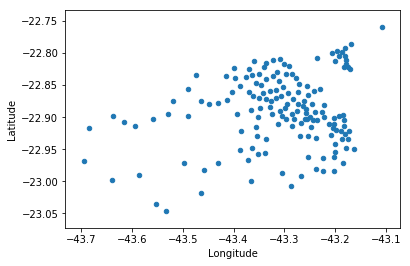

In [20]:
# Check again coherence of data
df_neigh2.plot(kind='scatter', y='Latitude', x='Longitude')

Seems so much better since now Paquetá (-22.758926 -43.109199) is the outlier, what makes sense, because this Neighborhood is actually an Island.

Now let's plot the map with Rio's neighborhoods to make sure everything is in place

In [21]:
latitude = -22.918873
longitude = -43.436411

rio_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_neigh2.Latitude, df_neigh2.Longitude, df_neigh2.Neighborhood):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='red',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(rio_map)

rio_map

The next step is to gather FourSquare's list of venues for each place.

In [22]:
VERSION = '20180605' # Foursquare API version
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
RADIUS = 2000

if(import_from_csv):
    df_venues = pd.read_csv(r'rio_venues')
else:
    df_venues = getNearbyVenues(df_neigh2['Neighborhood'], df_neigh2['Latitude'], df_neigh2['Longitude'], radius=RADIUS)
    df_venues.head()

São Cristóvão
Benfica
Caju
Catumbi
Centro
Cidade Nova
Estácio
Gamboa
Lapa
Mangueira
Paquetá
Rio Comprido
Santa Teresa
Santo Cristo
Saúde
Vasco da Gama
Botafogo
Catete
Copacabana
Cosme Velho
Flamengo
Gávea
Glória
Humaitá
Ipanema
Jardim Botânico
Lagoa
Laranjeiras
Leblon
São Conrado
Urca
Anil
Barra da Tijuca
Camorim
Cidade de Deus
Curicica
Freguesia de Jacarepaguá
Gardênia Azul
Grumari
Itanhangá
Jacarepaguá
Joá
Praça Seca
Pechincha
Recreio dos Bandeirantes
Tanque
Taquara
Vargem Grande
Vargem Pequena
Vila Valqueire
Jardim Sulacap
Bangu
Deodoro
Gericinó
Magalhães Bastos
Padre Miguel
Realengo
Santíssimo
Senador Camará
Vila Kennedy
Vila Militar
Barra de Guaratiba
Campo Grande
Cosmos
Guaratiba
Inhoaíba
Paciência
Pedra de Guaratiba
Santa Cruz
Senador Vasconcelos
Sepetiba
Alto da Boa Vista
Andaraí
Grajaú
Praça da Bandeira
Tijuca
Vila Isabel
Abolição
Água Santa
Cachambi
Del Castilho
Encantado
Engenho de Dentro
Engenho Novo
Higienópolis
Jacaré
Jacarezinho
Lins de Vasconcelos
Manguinhos
Maria da Gr

Let's check what are the most common kind of venues in Rio de Janeiro

In [24]:
# Export to csv
if(not import_from_csv):
    df_venues.to_csv('rio_venues', encoding='utf-8')

In [25]:
df_venues.groupby('Venue Category').count().sort_values(by=['Venue'], ascending=False)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Bar,744,744,744,744,744,744
Brazilian Restaurant,676,676,676,676,676,676
Gym / Fitness Center,476,476,476,476,476,476
Pizza Place,472,472,472,472,472,472
Bakery,437,437,437,437,437,437
Gym,416,416,416,416,416,416
Plaza,321,321,321,321,321,321
Restaurant,311,311,311,311,311,311
Fast Food Restaurant,296,296,296,296,296,296


### Seems like Cariocas' (people born in Rio) favorite things to do are <em>Drinking, Eating and Working out!</em>

In [26]:
df_venues.groupby(['Neighborhood', 'Venue Category']).count()

Neighborhood Latitude  \
Neighborhood Venue Category                                     
Abolição     Art Museum                                     1   
             Auto Dealership                                1   
             BBQ Joint                                      5   
             Bakery                                         2   
             Bar                                            8   
             Beer Garden                                    1   
             Bookstore                                      2   
             Bowling Alley                                  1   
             Brazilian Restaurant                           4   
             Burger Joint                                   2   
             Candy Store                                    1   
             Chocolate Shop                                 3   
             Clothing Store                                 1   
             Coffee Shop                                    2   
             Deli / Bodega                                  1   
             Farmers Market                                 1   
             Fast Food Restaurant                           2   
             Food & Drink Shop                              1   
             Food Truck                                     6   
             Frame Store                                    1   
             Fried Chicken Joint                            1   
             Gym                                            3   
             Gym / Fitness Center                           5   
             History Museum                                 1   
             Hot Dog Joint                                  1   
             Ice Cream Shop                                 3   
             Market                                         1   
             Middle Eastern Restaurant                      1   
             Pastelaria                                     1   
             Pet Store                                      1   
...                                                       ...   
Zumbi        Snack Place                                    2   
             Sports Club                                    1   
             Steakhouse                                     1   
             Supermarket                                    1   
             Sushi Restaurant                               1   
Água Santa   Acai House                                     1   
             Art Museum                                     1   
             Arts & Entertainment                           1   
             Bakery                                         3   
             Bar                                            4   
             Brazilian Restaurant                           1   
             Farmers Market                                 1   
             Food Truck                                     1   
             Fried Chicken Joint                            1   
             Fruit & Vegetable Store                        1   
             Grocery Store                                  1   
             Gym                                            2   
             Gym / Fitness Center                           1   
             Japanese Restaurant                            1   
             Martial Arts Dojo                              1   
             Mexican Restaurant                             1   
             Paintball Field                                1   
             Pharmacy                                       1   
             Pizza Place                                    3   
             Plaza                                          2   
             Restaurant                                     1   
             Snack Place                                    1   
             Soccer Field                                   1   
             Supermarket                                    1   
          

In [27]:
print('There are {} venues.'.format(df_venues.shape[0]))

There are 12399 venues.


In [28]:
print('There are {} unique categories of venues.'.format(len(df_venues['Venue Category'].unique())))

There are 348 unique categories of venues.


It's time starting processing the venues data for the Machine Learning algorithm

In [29]:
# one hot encoding
rio_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rio_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [rio_onehot.columns[-1]] + list(rio_onehot.columns[:-1])
rio_onehot = rio_onehot[fixed_columns]

rio_onehot.head()

,Neighborhood,ATM,Acai House,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,São Cristóvão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,São Cristóvão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,São Cristóvão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,São Cristóvão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,São Cristóvão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
rio_grouped = rio_onehot.groupby('Neighborhood').mean().reset_index()
rio_grouped

,Neighborhood,ATM,Acai House,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Abolição,0.00000,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
1,Acari,0.00000,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.019231,0.000000,0.0000,0.00,0.000000,0.000000,0.019231,0.000000,0.00
2,Alto da Boa Vista,0.00000,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0625,0.00,0.000000,0.000000,0.000000,0.000000,0.00
3,Anchieta,0.00000,0.014286,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
4,Andaraí,0.00000,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.00,0.010000,0.010000,0.000000,0.000000,0.01
5,Anil,0.00000,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
6,Bancários,0.00000,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.00
7,Bangu,0.00000,0.020000,0.01,0.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.00,0.010000,0.000000,0.000000,0.000000,0.00
8,Barra da Tijuca,0.00000,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.01,0.010000,0.000000,0.000000,0.000000,0.00
9,Barra de Guaratiba,0.00000,0.000000,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.00


Checking the number of Neighborhoods after regrouping

In [31]:
rio_grouped.shape

(157, 349)

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = rio_grouped['Neighborhood']

for ind in np.arange(rio_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rio_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abolição,Bar,Pizza Place,Food Truck,BBQ Joint,Gym / Fitness Center,Brazilian Restaurant,Sandwich Place,Ice Cream Shop,Soccer Stadium,Gym
1,Acari,Gym / Fitness Center,Supermarket,Plaza,Pizza Place,Snack Place,Market,Restaurant,Sandwich Place,Fast Food Restaurant,Ice Cream Shop
2,Alto da Boa Vista,Scenic Lookout,Garden,Sandwich Place,Sculpture Garden,Gym,Athletics & Sports,Outdoors & Recreation,Pharmacy,Bakery,Speakeasy
3,Anchieta,Plaza,Bakery,Bar,Fast Food Restaurant,Nightclub,Supermarket,Gym / Fitness Center,Burger Joint,Snack Place,Pizza Place
4,Andaraí,Bar,Gym,Bakery,Pizza Place,Gym / Fitness Center,Music Venue,Chocolate Shop,Pet Store,Ice Cream Shop,Dance Studio


In [34]:
# set number of clusters
kclusters = 10

rio_grouped_clustering = rio_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rio_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 0, 8, 0, 2, 2, 6, 2, 8, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

rio_merged = df_neigh2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
rio_merged = rio_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

rio_merged.head() # check the last columns!

,Zone,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central,São Cristóvão,-22.899318,-43.221935,4,Bar,Brazilian Restaurant,Portuguese Restaurant,Soccer Stadium,Dive Bar,BBQ Joint,Samba School,Italian Restaurant,Wine Bar,Gym / Fitness Center
1,Central,Benfica,-22.892297,-43.240341,9,Brazilian Restaurant,Portuguese Restaurant,Restaurant,Samba School,Sandwich Place,Wine Bar,Athletics & Sports,Burger Joint,Soccer Stadium,Gym / Fitness Center
2,Central,Caju,-22.880306,-43.221494,9,Brazilian Restaurant,Northeastern Brazilian Restaurant,Restaurant,Portuguese Restaurant,Boat or Ferry,Bakery,Soccer Stadium,Plaza,Athletics & Sports,Snack Place
3,Central,Catumbi,-22.919662,-43.199064,4,Brazilian Restaurant,Bar,Hotel,Dive Bar,Plaza,Italian Restaurant,Pizza Place,Café,Coffee Shop,Cocktail Bar
4,Central,Centro,-22.904393,-43.183065,8,Music Venue,Coffee Shop,Bookstore,Brazilian Restaurant,Salad Place,Burger Joint,Church,Middle Eastern Restaurant,Chocolate Shop,Cultural Center


In [36]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

rio_merged = df_neigh2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
rio_merged = rio_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

rio_merged.head() # check the last columns!

,Zone,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central,São Cristóvão,-22.899318,-43.221935,4,Bar,Brazilian Restaurant,Portuguese Restaurant,Soccer Stadium,Dive Bar,BBQ Joint,Samba School,Italian Restaurant,Wine Bar,Gym / Fitness Center
1,Central,Benfica,-22.892297,-43.240341,9,Brazilian Restaurant,Portuguese Restaurant,Restaurant,Samba School,Sandwich Place,Wine Bar,Athletics & Sports,Burger Joint,Soccer Stadium,Gym / Fitness Center
2,Central,Caju,-22.880306,-43.221494,9,Brazilian Restaurant,Northeastern Brazilian Restaurant,Restaurant,Portuguese Restaurant,Boat or Ferry,Bakery,Soccer Stadium,Plaza,Athletics & Sports,Snack Place
3,Central,Catumbi,-22.919662,-43.199064,4,Brazilian Restaurant,Bar,Hotel,Dive Bar,Plaza,Italian Restaurant,Pizza Place,Café,Coffee Shop,Cocktail Bar
4,Central,Centro,-22.904393,-43.183065,8,Music Venue,Coffee Shop,Bookstore,Brazilian Restaurant,Salad Place,Burger Joint,Church,Middle Eastern Restaurant,Chocolate Shop,Cultural Center


In [37]:
rio_merged['Cluster Labels'].max()

9

In [93]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rio_merged['Latitude'], rio_merged['Longitude'], rio_merged['Neighborhood'], rio_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' | Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Inspecting the distribution of clusters one can identify that near by neighborhoods tend to be similar, and the segmentation by population density, cultural diversity and wealth distribution of the city becomes more evident.

In [92]:
a = rio_merged[rio_merged['Cluster Labels']==7]
a

,Zone,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
70,Oeste,Sepetiba,-22.96798,-43.694087,7,Beach,Bakery,Food Truck,Pharmacy,Pier,Snack Place,Burger Joint,Big Box Store,Dessert Shop,Italian Restaurant


In [73]:
# Checking how many neighborhoods each cluster have
clusters_count=rio_merged.groupby('Cluster Labels').count().reset_index()
clusters_count.head(2)

,Cluster Labels,Zone,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,38,38,38,38,38,38,38,38,38,38,38,38,38,38
1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2


Text(0, 0.5, 'Neighborhoods Count')

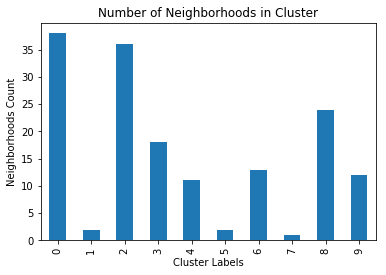

In [68]:
ax = clusters_count.plot(kind='bar', y='Zone', x='Cluster Labels', legend=False, title='Number of Neighborhoods in Cluster')
ax.set_ylabel('Neighborhoods Count')

### Checking the average of neighborhood venues by cluster

In [40]:
cluster_total = rio_onehot.groupby('Neighborhood').sum().head()
cluster_total.reset_index(inplace=True)
cluster_total.head()

,Neighborhood,ATM,Acai House,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,...,Vietnamese Restaurant,Warehouse Store,Water Park,Waterfall,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Abolição,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acari,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,Alto da Boa Vista,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Anchieta,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Andaraí,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [42]:
cols = [c for c in rio_merged.iloc[:, 5:]]

In [43]:
top_k = 10

clusters_counts = []

for cluster_n in range(0,kclusters):
    a=[]
    for i in range(5,15):
        a=a+[c for c in rio_merged[rio_merged['Cluster Labels']==cluster_n].iloc[:,i]]
    clusters_counts.append(pd.Series(a).value_counts())


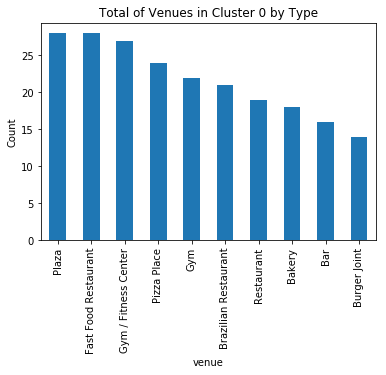

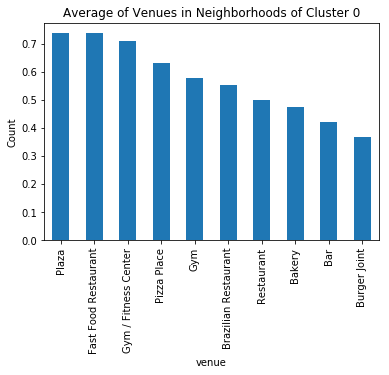

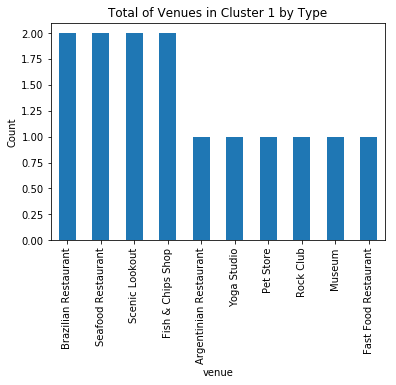

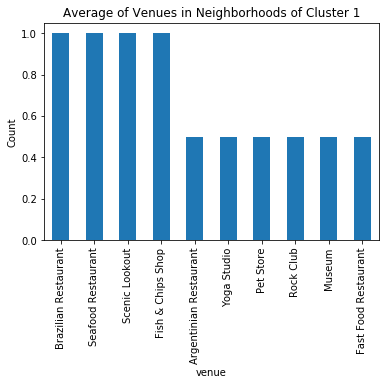

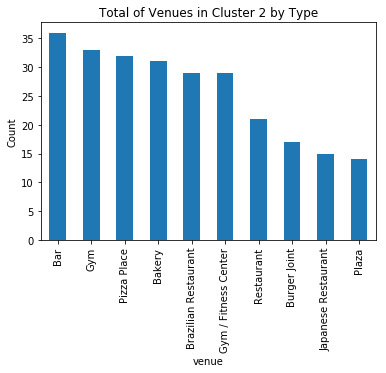

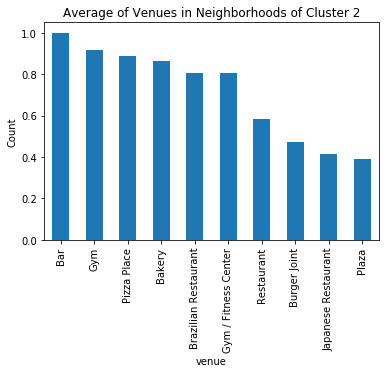

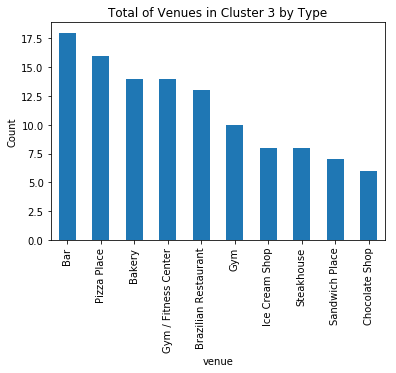

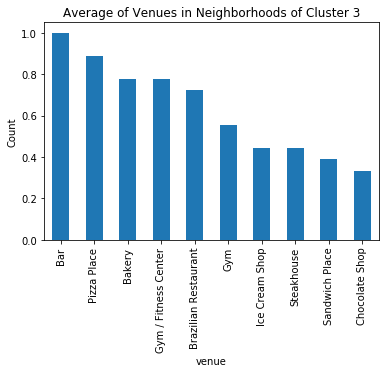

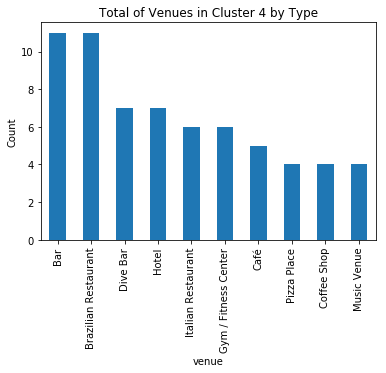

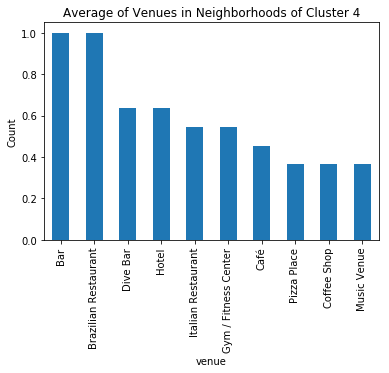

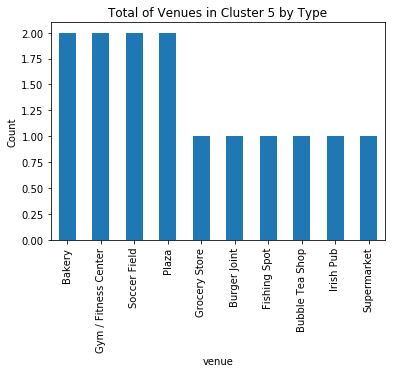

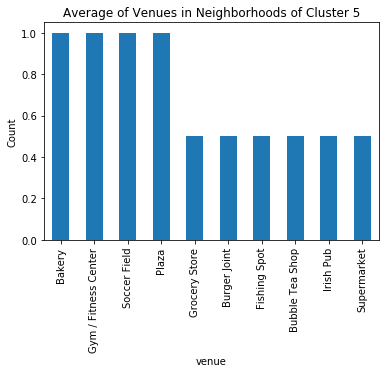

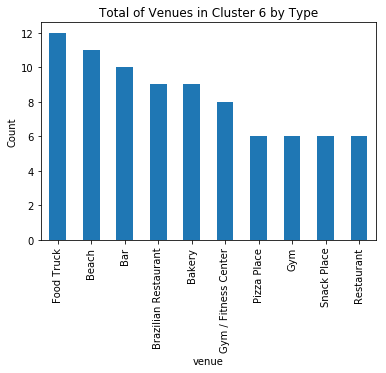

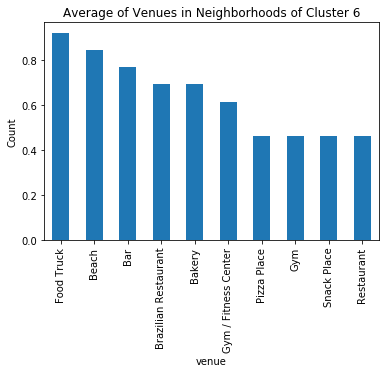

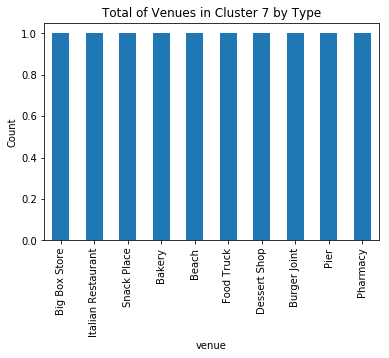

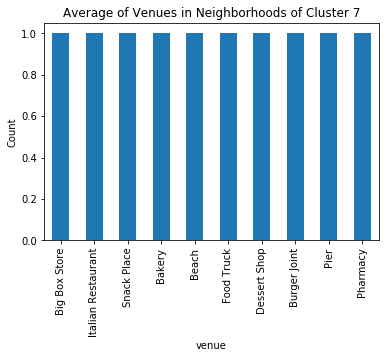

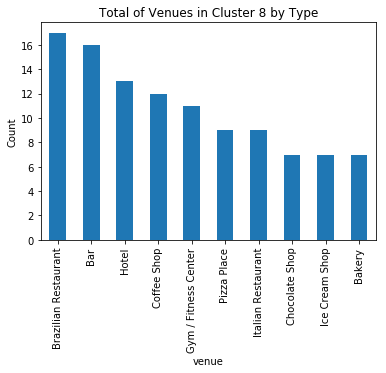

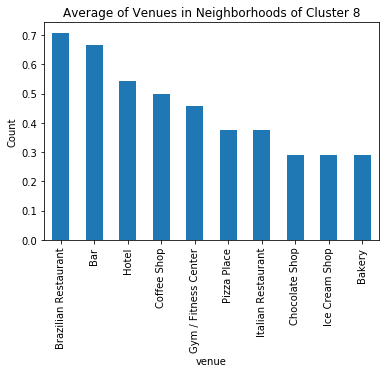

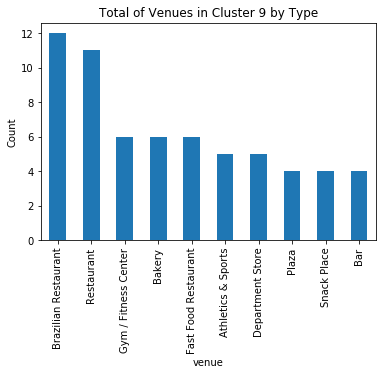

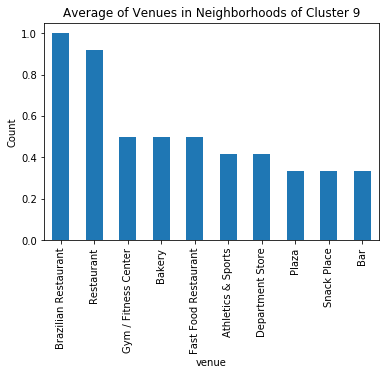

In [86]:
for j in range(0, kclusters):
    d = pd.DataFrame(clusters_counts[j][:10]).reset_index()
    d.columns = ['venue', 'count']
    ax = d.plot(kind='bar', x='venue', y='count', title='Total of Venues in Cluster {} by Type'.format(j), legend=False)
    ax.set_ylabel("Count")
    avg = d
    avg['count'] = d['count']/clusters_count.loc[j, 'Zone']
    ax = avg.plot(kind='bar', x='venue', y='count', title='Average of Venues in Neighborhoods of Cluster {}'.format(j), legend=False)
    ax.set_ylabel("Count")

<h3>
From the data above, we can see that there are clusters of neighborhoods with plenty of venues, while others have only a few.
<p>
<p>
The clusters with most venues are:
0, 1, 2, 4, 6, 7 and 9.
</h3>


### Inspecting the number of venues by cluster, it's possible to inference the population density in each one.

Text(0, 0.5, 'Count')

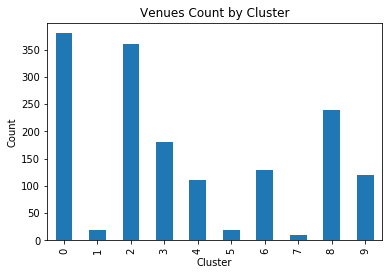

In [45]:
venues_total = pd.DataFrame([c.sum() for c in clusters_counts[:][:10]]).reset_index()
venues_total.columns = ['Cluster', 'Count']
ax = venues_total.plot(kind='bar', x='Cluster', y='Count', title='Venues Count by Cluster', legend=False)
ax.set_ylabel("Count")

# Results

We can see clearly that near neighborhoods have similar characteristics. This data has been pointed by the clusters segmented map created by the machine learning algorithm.

Taking this premise, we can evaluate that clusters 0, 2, 3, 4 and 8 are the ones with greatest representativity in the city map, possibly by having the biggest people density (this information have to be checked in future studies), these clusters are good places to start a business due to it's extended group of near by customers.

A next step would be to analyze what kind of business is the more feasible. Looking to the global counting in Rio, we see that bars, restaurants, gyms and bakeries are the most common places around the city.

Checking on the clusters barcharts, one can see that mainly on clusters 0, 2, 3, 4 and 8, exist possibilities of business that still have low density in the region e.g. burger joints.
Values under 0.5 in the barcharts represent that half of the neighborhoods have burger joints, so, possibly there is a migration of people from one neighborhood to another pursuing these services.

Another approach is to check over the venues that are present in many clusters and check which clusters have less of these.
Let's take the fitness center as an example... It's easy to see that cluster 1 and 7 have a lack of Gyms, and this could be a great opportunity for one interested in investing in this area.

# Discussion

It would be very important to cross this information with the population density of each place to get a more accurate data.
Another good approach would be to raise the radius of the Foursquare request to a higher value in an attempt to gather more venues and get an even finer processed data.
Enlarging the charts to instead of 10 we get 20 or more venues, might be a good idea to take a deeper look on other opportunities that may have passed by our attention.

# Conclusion

This work may not be as accurate as it could and might need more information to get a more detailed information, but by this moment, it's a good call to have an insight of areas of actuation that could be explored in each region.

One can observe a similar area and come by with an idea to explore a chosen region.

From the insights collected from this study, each cluster can be defined by it's venues characteristcs like, beaches, restaurants, gyms and so, one can come out with an idea to explore a segment derived from the population that frequent these venues.

Now it's all up to you. Hope you enjoyed this reading.